In [ ]:
import pandas as pd
from collections import Counter
from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' 
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Competition/KED 대상팀/data/0504_alltoken.pkl')

In [ ]:
data.shape  # 150만개,,

(1579169, 8)

In [ ]:
## 자주 등장하는 단어 제거
stopwords = ['부대사업', '사업', '각호', '에게'] 

def trash(x):
    x = [word for word in x if not word in stopwords]
    return list(set(x)) # 중복토큰도 제거

data['clean_토큰'] = data['token'].apply(trash)

In [ ]:
# 길이 추가
data['token_len'] = data['token'].apply(len)
data['clean_token_len'] = data['clean_토큰'].apply(len)

In [ ]:
data.head(1)

,company,industry_code,big,middle,small,least,leastleast,token,clean_토큰,token_len,clean_token_len
0,1000000,F41121,F,41,411,4112,41121,"[토목, 건축, 사업, 주택, 분양, 임대업, 경공, 사업, 산업, 설비, 사업, ...","[유지관리, 산업, 시설물, 설계, 처리, 부대, 토건업, 채취, 폐수, 분양, 주...",29,22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


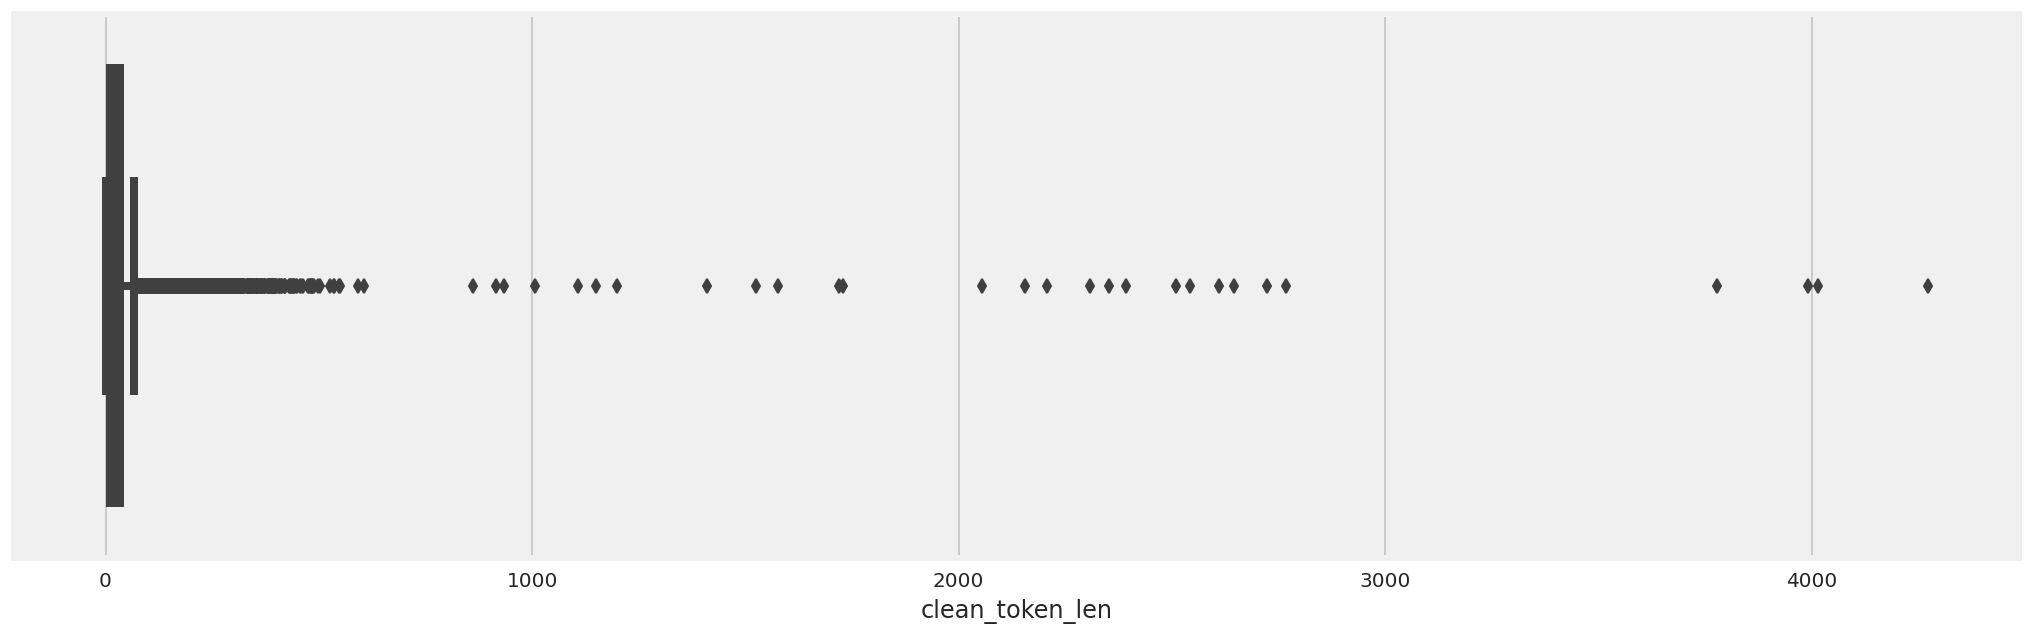

In [ ]:
# token_len box-plot
plt.figure(figsize=(16,5))
sns.boxplot(data['clean_token_len'])
plt.show()  

## TF-IDF

In [ ]:
data[:1263335].big.value_counts()

C    325449
F    175328
G    154749
L    111351
J    109556
N     75069
K     56952
S     56807
A     46741
M     40982
H     28471
P     22254
I     21588
R     14584
E     13861
Q      6530
D      2668
O       367
T        17
U        11
Name: big, dtype: int64

In [ ]:
X = [' '.join(x) for x in data.iloc[:,-3]]
y = data.big.tolist()
# split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1214, stratify=y)

In [ ]:
len(X)

1579169

In [ ]:
# 8:2로 임의로 자름
X_train = X[:1263335]    # 그냥 우선 순서대로 잘라봄(인덱스 원래 data랑 매칭할라고)
y_train = y[:1263335]    # 셔플은 X 자체를 셔플하면됨 
X_test = X[1263335:]
y_test = y[1263335:]

In [ ]:
X[0]

'유지관리 산업 시설물 설계 처리 부대 토건업 채취 폐수 분양 주택 분뇨 건축 임대업 판매 경공 축산 장비 골재 공업 설비 토목'

In [ ]:
print(len(X_train), len(X_test))

1263335 315834


In [ ]:
%%time
preprocessor = TfidfVectorizer(max_features=500)   # tf-idf
X_train_p = preprocessor.fit_transform(X_train, y_train).toarray()
X_test_p = preprocessor.transform(X_test).toarray()    

CPU times: user 40.5 s, sys: 2.69 s, total: 43.2 s
Wall time: 43 s


In [ ]:
X_train_p.shape   # 빈도수 행렬로 바뀜

(1263335, 500)

In [ ]:
X_train_p[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.18638762, 0.        , 0.        , 0.        , 0.30765501,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31478761, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21427358, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# 대분류 라벨링 
label_enc = LabelEncoder()    
y_train_p = label_enc.fit_transform(y_train)
y_test_p = label_enc.transform(y_test)

# Similarity

- KNN

In [ ]:
%%time
from sklearn.neighbors import NearestNeighbors    # knn neighbors
neigh = NearestNeighbors(metric='minkowski', algorithm='brute', n_neighbors=10, n_jobs=-1)
neigh.fit(X_train_p)   # minkowski 이것도 좋음

## X_train을 neighbor로 학습

CPU times: user 604 ms, sys: 14.9 ms, total: 619 ms
Wall time: 632 ms


In [ ]:
x_train_data = pd.DataFrame(X_train, columns=['token'])

In [ ]:
x_train_data.head()

,token
0,유지관리 산업 시설물 설계 처리 부대 토건업 채취 폐수 분양 주택 분뇨 건축 임대업...
1,부착물 부동산 제작 소매업 사항 포함 건축 기설 매매 판매 일반 판넬 재자 임대 부...
2,부동산 건설업 대지 주택 건축 임대업 조경 목공 조성업 부대
3,창호 제조업
4,비공 석산 주택공사 건설 목공 개발 토사 방지 정보통 환경 부동산 채취 재판매 오염...


In [ ]:
data[1263335:].iloc[0,:]

company                                       7601103
industry_code                                  G46203
big                                                 G
middle                                             46
small                                             462
least                                            4620
leastleast                                      46203
token              [사료, 제조, 판매업, 무역업, 부동산, 임대업, 부대사업]
clean_토큰                 [부동산, 무역업, 사료, 제조, 임대업, 판매업]
token_len                                           7
clean_token_len                                     6
Name: 280152, dtype: object

In [ ]:
p = X_test_p[0]   # test도 체크
p = p.reshape(-1, 1) 

In [ ]:
neigh.kneighbors(p.T)   # X_train에서 유사한 애들이 나옴 

(array([[0.        , 0.47729543, 0.48087008, 0.48318438, 0.51288334,
         0.51288334, 0.52856881, 0.53184829, 0.55113151, 0.55113151]]),
 array([[ 984113,  969503, 1107794, 1051152, 1113707, 1125443,  461402,
          390066,  589083,  401935]]))

In [ ]:
neigh.kneighbors(p.T)[0][0][0]

0.0

아예 토큰이 같으면 거리가 0임 !! 
> 0인게 나오면 무조건 투표 안하고 그걸로 분류??? 

In [ ]:
x_train_data.iloc[neigh.kneighbors(p.T)[1][0]]     # 왜 인덱스가 다르지...... 

,token
984113,부동산 무역업 사료 제조 임대업 판매업
969503,부동산 사료 제조 임대업 위호 동물 부대 판매업
1107794,무역업 사료 제조 양어 부동산업 부대 판매업
1051152,소매업 무역업 단미사료 사료 비료 제조 판매업
1113707,부동산 무역업 소매업 사료 임대업
1125443,부동산 무역업 소매업 사료 임대업
461402,부동산 사료 수출입 제조 임대업 부동산업 판매업
390066,부동산 무역업 사료 제조 식용유 임대업 위항 부수 단미 판매업
589083,유기질 비료 단비 사료 제조 농자 판매업
401935,사료 단백질 제조 첨가제 판매업


- 중복돼서 많이 등장하는 단어 노이즈 제거 필요

In [ ]:
# 실제 데이터에서 유사한 것 확인
vote = data[:1263335].iloc[neigh.kneighbors(p.T)[1][0]][['big', 'middle', 'small', 'least']]  

In [ ]:
vote

,big,middle,small,least
930,G,46,462,4620
589162,C,10,102,1021
124611,A,03,032,0322
67969,G,46,462,4620
130524,G,46,462,4620
142260,G,46,462,4620
81061,C,10,108,1080
9725,C,10,104,1040
208742,C,20,203,2031
21594,C,21,212,2123


In [ ]:
pd.DataFrame(vote['big'].value_counts()).index[0]   # 가장 많은 보팅 출력

'C'

In [ ]:
pd.DataFrame(vote['middle'].value_counts()).index[0]

'46'

In [ ]:
data[1263335:].iloc[0,:]   # 오 맞는데? ㅋㅋㅋㅋㅋㅋㅋㅋ

company                                       7601103
industry_code                                  G46203
big                                                 G
middle                                             46
small                                             462
least                                            4620
leastleast                                      46203
token              [사료, 제조, 판매업, 무역업, 부동산, 임대업, 부대사업]
clean_토큰                 [부동산, 무역업, 사료, 제조, 임대업, 판매업]
token_len                                           7
clean_token_len                                     6
Name: 280152, dtype: object

In [ ]:
data[:1263335].iloc[neigh.kneighbors(p.T)[1][0]].head(1)['big'].values   # 첫번쨰 열이 test랑 아예 같음..

array(['G'], dtype=object)

데이터 row별로 knn으로 유사한애들 20개 뽑아서 보팅으로 분류하면 대분류는 뚝딱일거 같다는 생각이 확 들어버렸음.......

In [ ]:
len(X_test_p)

315834

In [ ]:
x_test_data = pd.DataFrame(X_test, columns=['token'])

In [ ]:
x_test_data.iloc[0,:]

token    부동산 무역업 사료 제조 임대업 판매업
Name: 0, dtype: object

In [ ]:
x_test_data

,token
0,부동산 무역업 사료 제조 임대업 판매업
1,수산물 매도 약서 대행업 통신 무역업 물류 용품 제조업 일반 부수 식품 부동산 임대...
2,통신 의류 부동산 신발 소매업 용품 임대업 각항 스포츠 판매업
3,수탁 운영 농지 유통 재배 산업 개발 통신 생산 임대 관계 부동산 친환경 매매 공동...
4,도급업 엘이디 임가공 단말기 통신 무선 기기 무역업 제조업 반도체 부동산 임대업 판...
...,...
315829,수리 중개 지도 기계 각항 통신 수수료 제조업 교육 부대 반도체 부동산 임대업 가공...
315830,영상 수출입 유통 가정용품 축산물 인터넷 개발 통신 기기 제작 음향 전자 해당 생산...
315831,골재 기계 납품 운송 토공사 아스 건설 대여 도급
315832,직무 업무 변호사 제조 공증인 제항 변호사법 부대


In [ ]:
x_test_data['big_pred'] = 0   # 우선 채워놓음 
x_test_data['mid_pred'] = 0

In [ ]:
x_test_data['true_big'] = data[1263335:]['big'].values
x_test_data['true_mid'] = data[1263335:]['middle'].values

In [ ]:
x_test_data.head(1)

,token,big_pred,mid_pred,true_big,true_mid
0,부동산 무역업 사료 제조 임대업 판매업,0,0,G,46


In [ ]:
## 반복문 딱 대...  
## neigh : train 데이터로 이미 학습 (tf-idf 기반)

## 260개에 약 10분 
from tqdm import tqdm_notebook
import sys

find_data = data[:1263335]

for i in tqdm_notebook(range(2000)):    # len(X_test_p)
  p = X_test_p[i]   
  p = p.reshape(-1, 1) 

  if neigh.kneighbors(p.T)[0][0][0]==0:    # 토큰이 train과 아예 같을 때는 투표 X 
    x_test_data.iloc[i,1] = find_data.iloc[neigh.kneighbors(p.T)[1][0]].head(1)['big'].values  # 가장 많이 등장하는 대분류 
    x_test_data.iloc[i,2] = find_data.iloc[neigh.kneighbors(p.T)[1][0]].head(1)['middle'].values  # 가장 많이 등장하는 중분류
    pass 

  else:
    vote = find_data.iloc[neigh.kneighbors(p.T)[1][0]][['big', 'middle', 'small', 'least']]  
    # votting
    x_test_data.iloc[i,1] = pd.DataFrame(vote['big'].value_counts()).index[0]   # 가장 많이 등장하는 대분류 
    x_test_data.iloc[i,2] = pd.DataFrame(vote['middle'].value_counts()).index[0]  # 가장 많이 등장하는 중분류

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
x_test_data.iloc[:2000,:]

,token,big_pred,mid_pred,true_big,true_mid
0,부동산 무역업 사료 제조 임대업 판매업,[G],[46],G,46
1,수산물 매도 약서 대행업 통신 무역업 물류 용품 제조업 일반 부수 식품 부동산 임대...,G,46,G,46
2,통신 의류 부동산 신발 소매업 용품 임대업 각항 스포츠 판매업,G,46,G,46
3,수탁 운영 농지 유통 재배 산업 개발 통신 생산 임대 관계 부동산 친환경 매매 공동...,A,01,A,01
4,도급업 엘이디 임가공 단말기 통신 무선 기기 무역업 제조업 반도체 부동산 임대업 판...,C,26,G,46
...,...,...,...,...,...
1995,식점 홍보 기획 제작 서비스 무역업 광고 마케팅 작업 프랜차이즈 해당 외식 컨텐츠 ...,J,71,M,71
1996,구축 홍보 온라인 채소 음식 잡화 수출입 보조 생필품 경영 인터넷 대행업 통신 개발...,G,46,G,46
1997,기술 기존 중개 조기 필요 나노 진단 질병 개발 바이오센서 제품 제조업 업위 결합 ...,C,02,M,70
1998,계업 자재 국내외 토지 투자자 실내 엘이디 시행 일임 대행업 개발 기업 통신 제품 ...,J,58,G,46


In [ ]:
x_test_data.iloc[0,1]==x_test_data.iloc[0,3]

array([ True])

In [ ]:
big = 0
for i in range(len(x_test_data.iloc[:2000,:])):
  if x_test_data.iloc[i,1]==x_test_data.iloc[i,3] or (x_test_data.iloc[i,1]==x_test_data.iloc[i,3])==[ True] :
    big+=1

In [ ]:
big

998

In [ ]:
mid = 0
for i in range(len(x_test_data.iloc[:2000,:])):
  if x_test_data.iloc[i,2]==x_test_data.iloc[i,4]:
    mid+=1

In [ ]:
mid

966

In [ ]:
all = 0
for i in range(len(x_test_data.iloc[:2000,:])):
  if x_test_data.iloc[i,2]==x_test_data.iloc[i,4] or x_test_data.iloc[i,1]==x_test_data.iloc[i,3] :
    all+=1

In [ ]:
all

1093

In [ ]:
x_test_data.head()

,token,big_pred,mid_pred,true_big,true_mid,is_big,is_mid
0,판매업 제조 무역업 부동산 임대업 사료,G,46,G,46,0,1
1,판매업 대행업 생활 디자인 임대업 약서 통신 소매업 식품 행업 부동산 서비스업 물류...,G,46,G,46,0,1
2,판매업 소매업 각항 신발 의류 부동산 용품 임대업 스포츠 통신,G,46,G,46,0,1
3,판매 판매업 계약 임대 관계 생산 임대업 운영 재배 소규모 통신 매매 공동 부동산 ...,A,01,A,01,0,1
4,판매업 엘이디 인력 임대업 제조 통신 부동산 서비스업 임가공 조명 부품 기기 반도체...,C,26,G,46,0,1
...,...,...,...,...,...,...,...
315829,판매업 장비 임대업 제조 통신 각항 지도 부대 부동산 서비스업 중개 공작 기계 가공...,0,0,G,46,0,1
315830,제작 영상 축산물 생산 임대업 제조 소매 통신 소매업 농수 수출입 전자 인터넷 부대...,0,0,G,47,0,1
315831,대여 운송 아스 골재 건설 도급 기계 토공사 납품,0,0,H,49,0,1
315832,업무 공증인 제항 부대 변호사법 직무 제조 변호사,0,0,M,71,0,1


- 이게 보팅시스템이라서 그런가 대분류는 틀리는데 중분류는 맞는경우도 있음! 이것도 고려해야할듯.  

- 적절한 K 이웃 수, metric 같은것도 정해야함. 

- 너무 런타임이 오래걸리는 문제

- 토큰과 겹치는걸 보기때문에 토큰을 쳐내는 키워드 추출이나 다른 방법이 필요해보이기도 함 ( 중복 토큰 제거 ) 

## Modeling

In [ ]:
from tensorflow import keras
y_train_p = keras.utils.to_categorical(y_train_p)
y_test_p = keras.utils.to_categorical(y_test_p)

In [ ]:
n_features = 500      # tf-idf 차원
n_classes = 20         # 대분류 개수

## input (1263335, 500) output 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM, SimpleRNN, Dropout

model = Sequential()
model.add(Dense(1000, kernel_initializer= 'he_normal', activation='relu', input_dim=500))
# model.add(Dropout(0.8))

model.add(Dense(50, kernel_initializer= 'he_normal', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                10050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
Total params: 71,270
Trainable params: 71,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_p, y_train_p, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
2221/2221 [==============================] - 6s 2ms/step - loss: 1.7375 - accuracy: 0.4563 - val_loss: 1.0697 - val_accuracy: 0.6608
Epoch 2/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.4021 - accuracy: 0.5502 - val_loss: 1.0235 - val_accuracy: 0.6693
Epoch 3/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.3561 - accuracy: 0.5628 - val_loss: 1.0051 - val_accuracy: 0.6718
Epoch 4/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.3331 - accuracy: 0.5690 - val_loss: 0.9823 - val_accuracy: 0.6771
Epoch 5/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.3099 - accuracy: 0.5762 - val_loss: 0.9757 - val_accuracy: 0.6792
Epoch 6/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.3029 - accuracy: 0.5776 - val_loss: 0.9755 - val_accuracy: 0.6788
Epoch 7/20
2221/2221 [==============================] - 5s 2ms/step - loss: 1.2942 - accuracy: 0.5806 - val_loss: 0.9719 - val_accuracy:

In [ ]:
model.evaluate(X_test_p,y_test_p)  # 오버피팅은 없긴함...ㅋㅋ.ㅋ..ㅋ.ㅋ.ㅋ.ㅋ...

9870/9870 [==============================] - 14s 1ms/step - loss: 0.9625 - accuracy: 0.6822


[0.9625368714332581, 0.6821590065956116]

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'g',label='training acc')
plt.plot(epochs,val_acc,'ro',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'g',label='training loss')
plt.plot(epochs,val_loss,'ro',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()